In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Central Limit Theorem

Okay this is all great. We now have a method of looking at samples from the normal distirbution with an unkown mean $\mu$ and using the sample mean $\bar{Y}$ to build confidence intervals in which we believe the ture value of the mean should be. We also have a method of adjusting our expectations to cases where we do not know the true value of $\sigma$. 

So that is all really great. However one might be getting worried at this point:

"Dr. Pierce. Are we going to have to do these calculations again for the Gamma Distribution and the Beta Distribution, and what about the Binomial and Poisson Distributions?"

To which, I can now let you know with great joy, that "No" we do not need to do that. And in fact it turns out that in most cases we do not even need to know what distribution we are even sampling from, provided that we have some freedom to choose a large enough sample.

## From the homework

Consider sampling from the beta distribution (I changed it from last calss) just using the sampling procedure:



In [2]:
from scipy.stats import beta

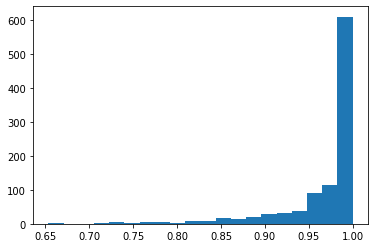

In [16]:
# Let's draw samples of size 5 (a relatively small sample), compute their mean, and then bin the results:
# from the exponential distribution with mean 15.

result = []

for k in range(1000):
    sample = beta.rvs(3, 0.1, size = 3)
    result += [ sample.mean() ]
    
plt.hist(result, bins=20);

What we get is a *mound* shape that is slightly skewed.

What happens as we increase the size of the sample in the experiment?

## This Always Happens

The **Central Limit Theorem** states that:

If $Y_1, Y_2, \dots, Y_n$ are independent identically distributed random variables with $E(Y_i) = \mu$ and $V(Y_i) = \sigma^2$ then let

$$ U_n = \sqrt{n} \frac{\bar{Y} - \mu}{\sigma} $$

Then the distribution of the $U_n$ converges to the standard normal distribution function as $n\to \infty$. I.e. 

$$ \lim_{n\to \infty} P(U_n < u) = \int_{-\infty}^u \frac{1}{\sqrt{2\pi}} e^{-t^2/2} dt $$

### Discussion

Note a few things:

- We do not need to know anything about the distribution of $Y$ except that it has a well defined mean and variance: for example the theorem fails if we try to use the uniformly distributed *real numbers*. 
- While the limit of the distributions of $U_n$ is given, the rate at which these distributions converge is not: in fact this rate will depend on the distribution of the $Y_i$. 
- You might be wondering why we phrased the last part in terms of the cummulative distribution functions:  Well because the theorem is true when the $Y$ are discrete, and thus the $U_n$ are discrete and do not have a density.

### Example

In the 2020 NHL Season, teams averaged 2.9 goals scored per game, with a standard deviation of 0.41 goals. The *Tampa Bay Lightning* played 21 games and averaged 3.5 goals scored per game. Can we conclude from the goals scored per game that they were a significantly better team the rest of the league?

In [ ]:
u = np.sqrt(21)* (3.5 - 2.9)/0.41
u

In [ ]:
# The probability that in a randomly selected set of 21 games the number of goals scored would average
# to more than 3.5 goals scored per game:

1 - norm.cdf(u)

We have therefor very strong evidence that the Tampa Bay team was better than average in the league.

Another example from the same season:  the Dallas Stars played 19 games with 2.7 goals per game. Can we conclude that they were significantly worse than the league as a whole?

In [ ]:
u = np.sqrt(19)*( 2.7 - 2.9)/0.41
u

In [ ]:
# The probability that in a radnomly selected set of 19 games the number of goals scored would average
# to less than 2.7 goals scored per game: 

norm.cdf(u)

Here we get a somewhat more mixed result, though the probability of such an outcome is only 1.6%. 

#### Poisson Distribution

An interesting question is what the distribition of the number of goals scored in a game is, and its not hard to convince yourself that Poisson is probably the place to start. However in the context of the average number of goals over a set of $n$ games, the question of whether the distribution is Poisson or something else becomes less and less important as $n$ increases because of the Central Limit Theorem.

With the example above, with $n = 19$ or $21$ we are in the region where treating the statistics as normally distributed may or may not be valid. Ideally we would have some additional evidence, maybe looking over multiple years of performance indicating that this is or is not a valid assumption. 

## Proof of the Central Limit Theorem

The proof relies on the following theorem:

**Convergence of Moment Generating Functions** If $U_1, U_2, \dots $ is a sequence of random variables with moment generating functions $m_1(t), m_2(t), \dots,$ respectively, $U$ is a random variable with moment generating function $m(t)$ then if 

$$\lim_{n\to \infty} m_n(t) = m(t) $$ for all $t$, then the distribution of $U_n$ converges to the distribution of $U$.

This is not a shocking result so we skip a proof of it.

### Proof of the Central Limit Theorem

Given the conditions of the Central Limit Theorem, we have $$ U_n = \sqrt{n} \frac{\bar{Y} - \mu}{\sigma} = \frac{1}{\sqrt{n}} \sum Z_i $$ where 
$$ Z_i = \frac{Y_i - \mu}{\sigma} $$

Because the $Y_i$ are idependent and identically distributed we have the following result for the moment generating function of $\sum Z_i$:

$$ m_{\sum Z_i}(t) = ( m_{Z_1}(t) )^n $$

and therefore

$$ m_{U_n}(t) = \left( m_{Z_1}\left(\frac{t}{\sqrt{n}}\right) \right)^n $$


Okay. So now let's see what we can say about $m_{Z_1}(t)$. 

We can use Taylors Theorem to give:

$$ m_{Z_1}(t) = m_{Z_1}(0) + m_{Z_1}'(0) t + m_{Z_1}''(\xi) \frac{t^2}{2} $$ for some $\xi \in (0, t) $

The helpful things are that we know the first two of these coefficients:  $$m_{Z_1}(0) = E(1) = 1$$ and $$m_{Z_1}'(0) = E(Z_1) = 0 $$

Therefore

$$ m_{U_n}(t) = \left[ 1 + \frac{m_{Z_1}''(\xi_n) t^2 / 2}{n} \right]^n $$ 

Noting that the $0 < \xi_n < \frac{t}{\sqrt{n}}$ might be different for each $n$ but that they are also getting pinched to 0.

We then observe that $$\lim_{x\to 0} m_{Z_1}''(x) = E(Z_1^2) = 1 $$

Finally we need the classic result about the exponential that $$ \lim_{n\to \infty} \left[ 1 + \frac{t^2/2}{n} \right]^n = e^{t^2/2} $$

Putting it all together we have:

$$\lim_{n\to \infty} m_{U_n}(t) = e^{t^2/2} $$

The moment generating function of the standard normal random variable.

### Another Example

American households spent in 2019 an average of 64.83 dollars on movie streaming services with a standard deviation of 35 dollars. Note that the distribution of $Y$ the amount an American Household spends on movie streaming is almost surely not normally distributed - there are large numbers of people spending nothing on streaming.

- So an example of question we could not answer without doing more to find this distribution would be:  What is the probability tha the Pierce family spends less than 20 dollars per year on movie streaming.

- However the Central Limit Theorem tells us that if we average over lots of households, we expect that statistics to be normal.

For example: A small town of 100 households spends on average 60 dollars per year on movie streaming services. Do we have evidence that this town does not represent a random sample of 100 households for streaming services expenses?

In [ ]:
Z = np.sqrt(100)* (60 - 64.83)/35
Z

In [ ]:
from scipy.stats import norm

norm.cdf(Z)

### Example - Binomial Distribution Revisited

Our first example was the binomial distribution:  X is a 1 with probability p and 0 with probability 1-p and then the binomial variable is

$$ Y = \sum X_i $$

for $X_i$ a sample of size n from the trial. 

Consequently this is more less a result that fits out *Central Limit Theorem*:  

$$ \frac{1}{n} Y = \frac{1}{n} \sum X_i$$

is the average value of the $X_i$, and therefore as $n\to \infty$ we expect $1/n Y$ to approach a normal distribution.

Check that: $ E(X) = p $ and $ V(X) = p (1-p) $


Then:

$$ U = \sqrt{n} \frac{ \frac{1}{n} Y - p }{ \sqrt{p (1-p)} } = \frac{ Y - np}{ \sqrt{n p (1-p)} } $$

is converging to a standard normal distribution.

### Example 

A 2015 survey of US college students indicated that 11.2% of 4-year college students faced food insequrity (defined as being unsure they would have enough food for their household in the next month or that they did not know when their next meal would be).

A group of 75 students are attending an event at a particular university and a survey of them indicates that 15 of them are experiencing food insecurity. The expected number would be 0.112 * 75 = 8.4. How likely is it, if this group is reflective of 75 randomly chosen US college students that the number experiencing food insecurity would be 15 or more?



We compute the Z score of the values of:  $Y \geq 15$

$$ Y \geq 15 $$

$$ Y - n p \geq 15 - np $$

$$ \frac{Y-np}{\sqrt{n p (1-p)}} \geq \frac{15 - np}{\sqrt{n p (1-p)}} $$ 


In [ ]:
p = 0.112
n = 75

b = (15 - n*p)/ np.sqrt( n*p *(1-p) )
b

In [ ]:
# We need to use the complement of the CDF for the Normal Distribution to get the probability of the right 
# tail Z > b.

1 - norm.cdf(b)

We would conclude that there is less than a 1% chance that if the group is randomly selected from all US College Students that we would have 15 or more students with food insecurity, and therefore that something is different about our group.

#### Problem

Does anything bother you about our computation that $P( Y \geq 15) = 0.0078$?

### Discussion

Note how much easier that would be than building the distribution for $P(Y \geq 15)$. Even using a computer, this is a much faster process by appealing to the normal distribution. 

How large $n$ needs to be so that this normal approximation is valid depends on the value of p and the size of the sample. The general rule of thumb is that 

$$ p \pm 3 \sqrt{pq/n} $$ should be in the interval $(0, 1)$.

In [ ]:
# For the example above

p - 3*np.sqrt( p*(1-p) / n), p + 3 *np.sqrt( p*(1-p) / n)

## Test Scores

Standardized tests like the SAT and ACT are normalized over multiple years to a normal distribution. The Central Limit Theorem explains why one would expect a test with a large number of correct / wrong questions to have total scores that follow a normal distribution. 

The individual questions are the binomial trials, and so one might be able to convince themselves that the average number of correct questions should fit a normal distribution provided that the number of questions is large enough. 

What is the problem?